# Feature engineering

### 👀 Load dataset

In [1]:
import pandas as pd

data = pd.read_csv('clean_data/clean_data.csv')

# move column 'Price' to the end of the dataframe
data = data[['Screen size', 'Screen type', 'Chip', 'RAM', 'ROM', 'Batery', 'OS', 'Screen resolution', 'Mobile network', 'Camera count', 'Camera max MP', 'Price']]

print(data.shape)
data.head()


(1670, 12)


,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Camera count,Camera max MP,Price
0,6.70,OLED,snapdragon,8192.0,262144.0,5000.000000,android,2.592000e+06,4.0,0,37.530168,10190
1,6.10,LCD,apple,4096.0,65536.0,3110.000000,ios,1.483776e+06,4.0,0,37.530168,11490
2,6.70,OLED,apple,6144.0,131072.0,4325.000000,ios,3.566952e+06,4.0,0,37.530168,29790
3,6.43,OLED,snapdragon,4096.0,65536.0,5000.000000,android,2.275550e+06,4.0,0,37.530168,4490
4,6.70,OLED,apple,6144.0,131072.0,4401.634448,ios,3.566952e+06,4.0,0,37.530168,27000


### 🎨 Convert categorical features to numeric type

In [2]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data

label_encoder(data, 'Screen type')
label_encoder(data, 'Chip')
label_encoder(data, 'OS')

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Camera count,Camera max MP,Price
0,6.700000,1,3,8192.000000,262144.000000,5000.000000,0,2.592000e+06,4.0,0,37.530168,10190
1,6.100000,0,0,4096.000000,65536.000000,3110.000000,1,1.483776e+06,4.0,0,37.530168,11490
2,6.700000,1,0,6144.000000,131072.000000,4325.000000,1,3.566952e+06,4.0,0,37.530168,29790
3,6.430000,1,3,4096.000000,65536.000000,5000.000000,0,2.275550e+06,4.0,0,37.530168,4490
4,6.700000,1,0,6144.000000,131072.000000,4401.634448,1,3.566952e+06,4.0,0,37.530168,27000
...,...,...,...,...,...,...,...,...,...,...,...,...
1665,6.133899,0,1,3072.000000,32768.000000,4000.000000,0,2.275550e+06,4.0,0,37.530168,2290
1666,6.133899,0,1,2048.000000,32768.000000,3000.000000,0,2.275550e+06,4.0,0,37.530168,1990
1667,6.133899,0,1,2048.000000,32768.000000,2950.000000,0,2.275550e+06,4.0,0,37.530168,1990
1668,6.133899,0,1,5882.149029,152752.761905,4401.634448,0,2.275550e+06,4.0,0,37.530168,650


### ✂️ Split Train-Test dataset

In [3]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.25, random_state=1)

### 🔍 Check out data distribution of data_train

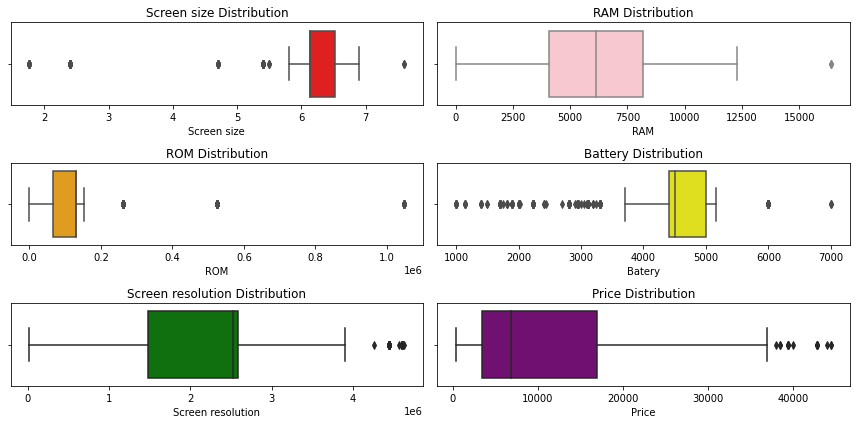

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 2, figsize=(12,6))

ax1 = plt.subplot(321)
ax1 = sns.boxplot(data=data_train, x='Screen size', color='red')
ax1.set_title("Screen size Distribution")

ax2 = plt.subplot(322)
ax2 = sns.boxplot(data=data_train, x='RAM', color='pink')
ax2.set_title("RAM Distribution")

ax3 = plt.subplot(323)
ax3 = sns.boxplot(data=data_train, x='ROM', color='orange')
ax3.set_title("ROM Distribution")

ax4 = plt.subplot(324)
ax4 = sns.boxplot(data=data_train, x='Batery', color='yellow')
ax4.set_title("Battery Distribution")

ax5 = plt.subplot(325)
ax5 = sns.boxplot(data=data_train, x='Screen resolution', color='green')
ax5.set_title("Screen resolution Distribution")

ax6 = plt.subplot(326)
ax6 = sns.boxplot(data=data_train, x='Price', color='purple')
ax6.set_title("Price Distribution")

plt.tight_layout()

🔖 ***'Screen size', 'RAM', 'ROM', 'Battery', 'Screen resolution', 'Price'*** have outliers

Text(0.5, 1.0, 'Price Distribution')

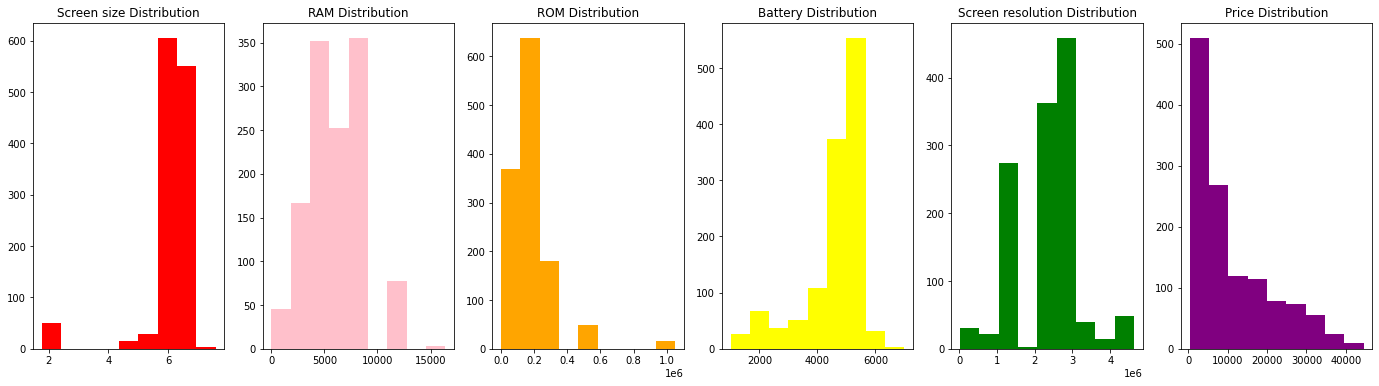

In [5]:
fig, ax = plt.subplots(1, 6, figsize=(24,6))
(ax1, ax2, ax3, ax4, ax5, ax6) = ax

ax1.hist(data_train['Screen size'], bins=9, color='red')
ax1.set_title("Screen size Distribution")

ax2.hist(data_train['RAM'], bins=9, color='pink')
ax2.set_title("RAM Distribution")

ax3.hist(data_train['ROM'], bins=9, color='orange')
ax3.set_title("ROM Distribution")

ax4.hist(data_train['Batery'], bins=9, color='yellow')
ax4.set_title("Battery Distribution")

ax5.hist(data_train['Screen resolution'], bins=9, color='green')
ax5.set_title("Screen resolution Distribution")

ax6.hist(data_train['Price'], bins=9, color='purple')
ax6.set_title("Price Distribution")

All features have **skewed** distribution, use **IQR** to find the upper and lower bounds

### 🧹 Outlier processing using IQR

In [6]:
import numpy as np

def outliers_iqr(column):
  q1, q3 = np.percentile(data_train[column], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  data_train[column] = data_train[column].clip(lower_bound, upper_bound)

  return data_train[column]

data_train['Screen size'] = outliers_iqr('Screen size')
data_train['RAM'] = outliers_iqr('RAM')
data_train['ROM'] = outliers_iqr('ROM')
data_train['Batery'] = outliers_iqr('Batery')
data_train['Screen resolution'] = outliers_iqr('Screen resolution')
data_train['Price'] = outliers_iqr('Price')

### 📊 Data distribution with outlier processing

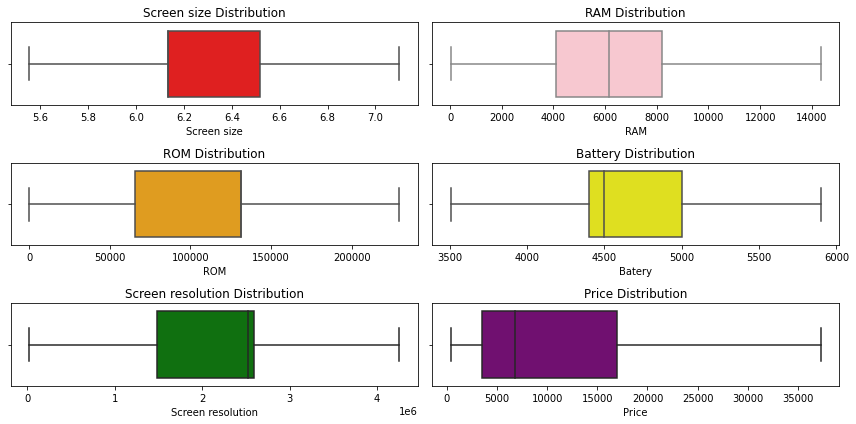

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 2, figsize=(12,6))

ax1 = plt.subplot(321)
ax1 = sns.boxplot(data=data_train, x='Screen size', color='red')
ax1.set_title("Screen size Distribution")

ax2 = plt.subplot(322)
ax2 = sns.boxplot(data=data_train, x='RAM', color='pink')
ax2.set_title("RAM Distribution")

ax3 = plt.subplot(323)
ax3 = sns.boxplot(data=data_train, x='ROM', color='orange')
ax3.set_title("ROM Distribution")

ax4 = plt.subplot(324)
ax4 = sns.boxplot(data=data_train, x='Batery', color='yellow')
ax4.set_title("Battery Distribution")

ax5 = plt.subplot(325)
ax5 = sns.boxplot(data=data_train, x='Screen resolution', color='green')
ax5.set_title("Screen resolution Distribution")

ax6 = plt.subplot(326)
ax6 = sns.boxplot(data=data_train, x='Price', color='purple')
ax6.set_title("Price Distribution")

plt.tight_layout()

### 🔨 Normalize the data with z-score

🔖 Rescale the data so that this feature values are centered around 0

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vars_normalizing = ['RAM', 'ROM', 'Batery', 'Screen resolution']

data_train[vars_normalizing] = scaler.fit_transform(data_train[vars_normalizing])
data_test[vars_normalizing] = scaler.transform(data_test[vars_normalizing])

data_train

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Camera count,Camera max MP,Price
1545,6.100000,1,0,-0.635926,1.586480,-0.289721,1,0.821500,4.0,0,37.530168,23690.0
912,6.133899,1,3,0.102449,0.079245,-0.556342,0,0.386249,5.0,4,64.000000,7490.0
1069,6.600000,0,1,-0.635926,0.079245,0.762394,0,0.396401,4.0,4,50.000000,4490.0
1410,6.100000,1,0,0.102449,0.079245,-0.289721,1,0.821500,4.0,0,37.530168,27490.0
1329,6.560000,0,3,0.102449,0.079245,0.762394,0,-1.295536,4.0,3,13.000000,5350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,6.133899,1,0,0.102449,1.586480,-0.289721,1,1.531775,5.0,2,12.000000,36990.0
905,6.133899,0,2,0.840825,0.079245,0.762394,0,0.396401,4.0,4,50.000000,5790.0
1096,5.554747,0,1,0.008043,-1.867600,-1.867893,0,-2.569001,4.0,1,3.000000,890.0
235,6.700000,1,1,0.840825,1.586480,0.410731,0,0.386249,4.0,0,37.530168,23000.0


# Feature selection

### 📈 Plot numerical

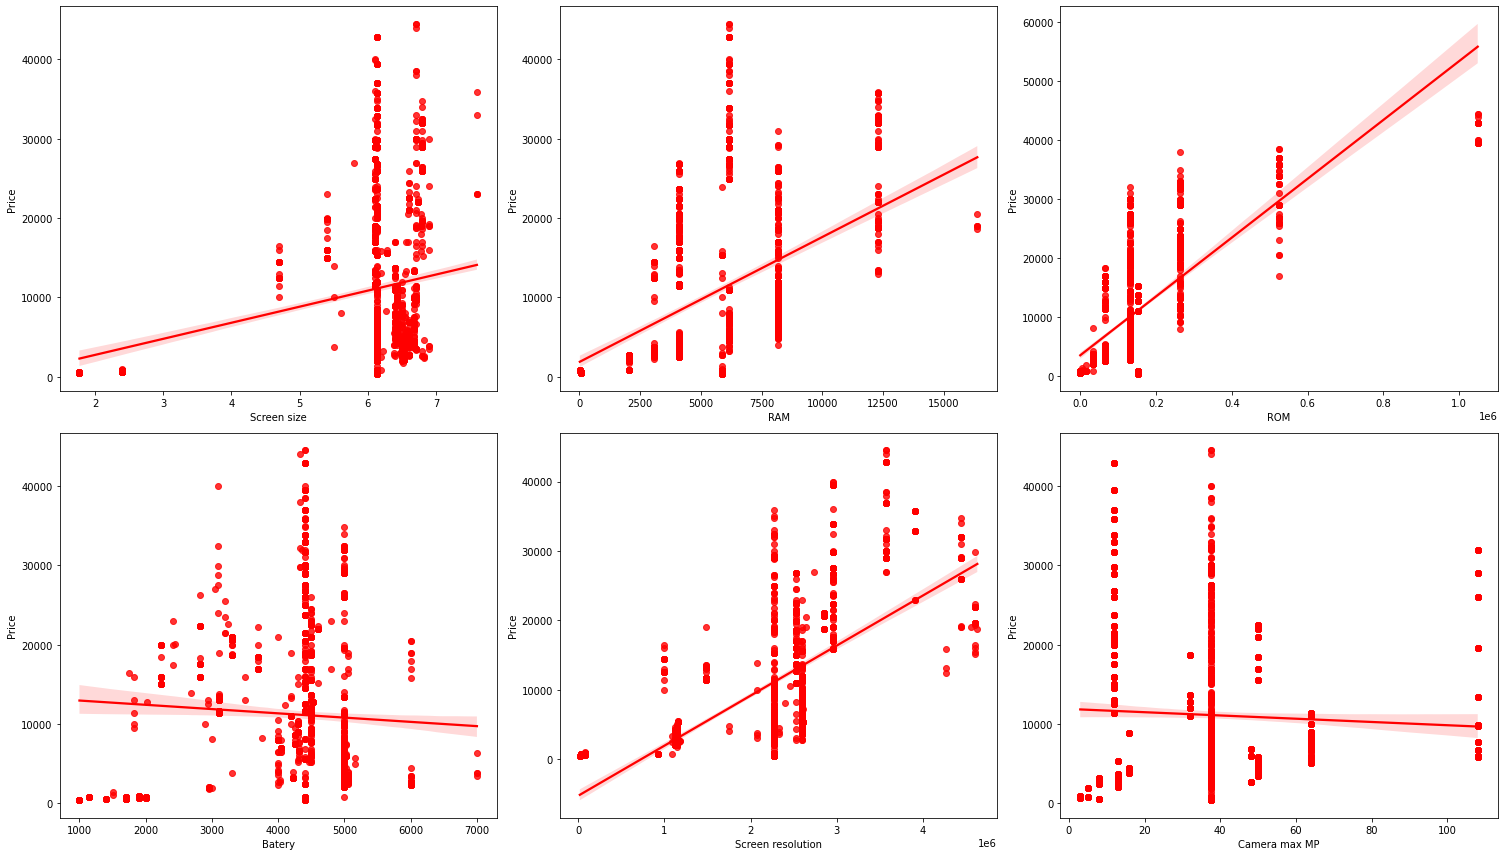

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(21,12))

ax1 = plt.subplot(231)
ax1 = sns.regplot(data=data, y='Price', x='Screen size', color='red')
ax2 = plt.subplot(232)
ax2 = sns.regplot(data=data, y='Price', x='RAM', color='red')
ax3 = plt.subplot(233)
ax3 = sns.regplot(data=data, y='Price', x='ROM', color='red')
ax4 = plt.subplot(234)
ax4 = sns.regplot(data=data, y='Price', x='Batery', color='red')
ax5 = plt.subplot(235)
ax5 = sns.regplot(data=data, y='Price', x='Screen resolution', color='red')
ax6 = plt.subplot(236)
ax6 = sns.regplot(data=data, y='Price', x='Camera max MP', color='red')

plt.tight_layout()

### 👀 Select feature based on heatmap

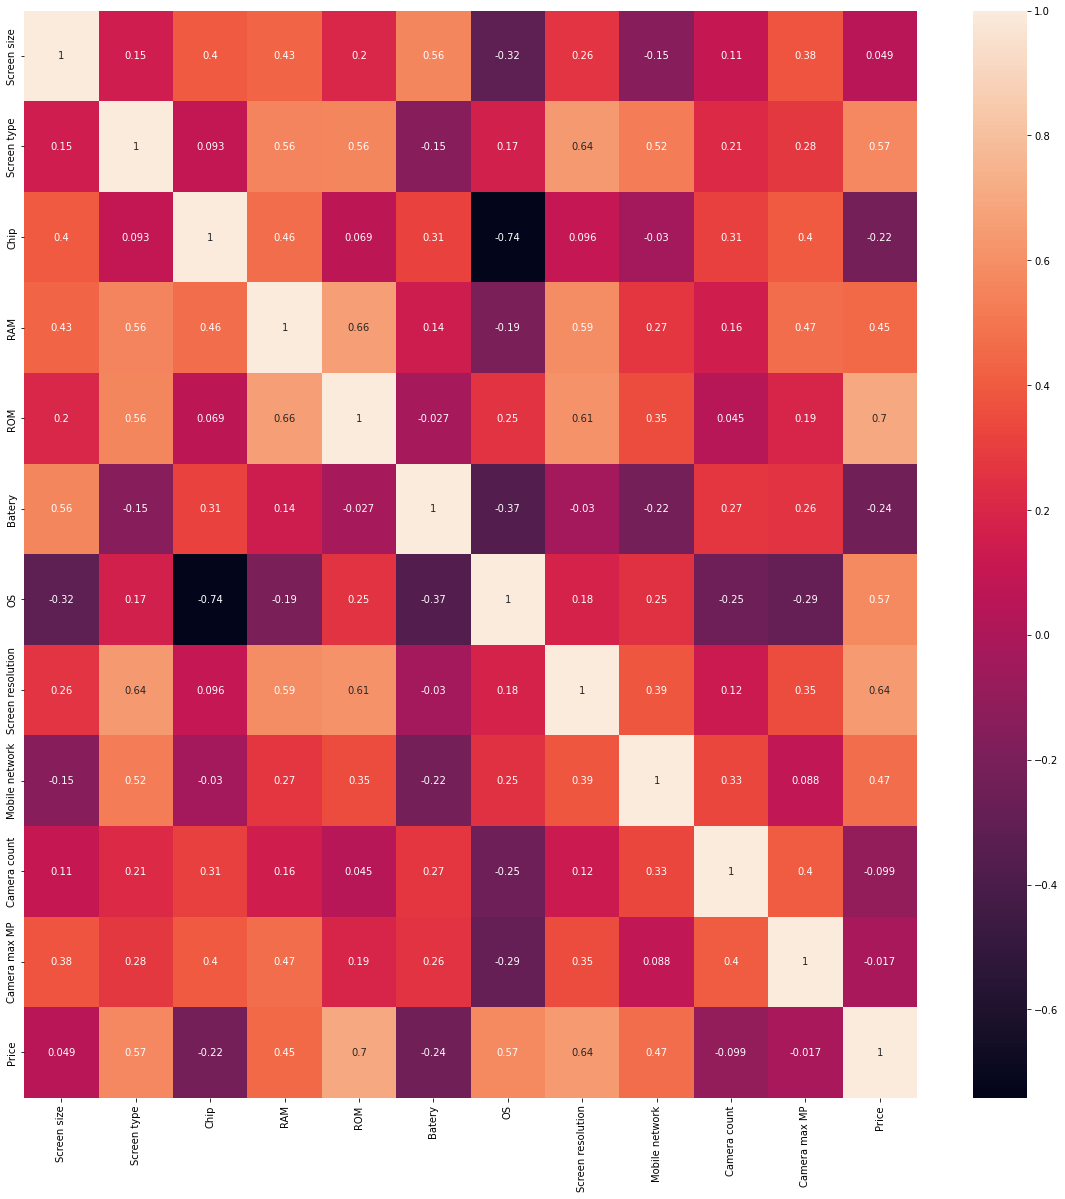

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(data):
    # get correlation matrix
    corr = data.corr()
    plt.figure(figsize=(20, 20))

    # plot heatmap
    sns.heatmap(corr, annot=True)
    plt.show()

plot_heatmap(data_train)

In [11]:
corr = data.corr()
corr['Price'].sort_values(ascending=False)

Price                1.000000
ROM                  0.729842
Screen resolution    0.630131
OS                   0.572013
Screen type          0.552199
Mobile network       0.479628
RAM                  0.446790
Screen size          0.177021
Camera max MP       -0.048290
Batery              -0.052104
Camera count        -0.099076
Chip                -0.225053
Name: Price, dtype: float64

* Target price range has highly positive correlation between *'ROM'*
* Also
  * *'Screen resolution'* and *'OS'*
  * *'Screen type'*, *'RAM'* and *'Mobile network'*
  * '*Chip*'

In [12]:
data_train = data_train.drop(['Screen size', 'Camera count', 'Camera max MP'], axis=1)
data_test = data_test.drop(['Screen size', 'Camera count', 'Camera max MP'], axis=1)

### 📝 Export data to csv

In [13]:
data_train.to_csv('train_test_data/train_data.csv', index=False)
data_test.to_csv('train_test_data/test_data.csv', index=False)